### 이진검색 
    - 배열의 데이터가 정렬되어 있어야함 
    - 선형 검색보다 빠르게 검색 가능 
    - 계속 반으로 자르는 방식으로 범위를 좁혀나감

In [1]:
from typing import Any, Sequence

def bin_search(a : Sequence, key : Any) -> int:
    
    pl = 0
    pr = len(a) - 1
    
    while True:
        pc = (pl + pr) // 2 # 중앙 원소 인덱스, 이걸 활용하여 범위를 좁혀나감 
        if a[pc] == key:
            return pc
        elif a[pc] < key:
            pl = pc + 1 # 검색 범위를 뒤쪽 절반으로 좁힌다
        else:
            pr = pc - 1 # 검색 범위를 앞쪽 절반으로 좁힌다
        if pl > pr :
            break
    return -1 

if __name__ == '__main__':
    num = int(input('원소 수를 입력하세요 : '))
    x = [None] * num
    
    print('배열 데이터를 오름차순으로 입력하세요.')
    
    x[0] = int(input('x[0] : '))
    
    for i in range(1, num):
        while True:
            x[i] = int(input(f'x[{i}] : '))
            if x[i] >= x[i - 1]:
                break # 오름차순으로 값이 입력되야하는데 오름차순의 규칙을 벗어나면 break
                
                
    ky = int(input('검색할 값을 입력하세요 :'))
    
    idx = bin_search(x, ky)
    
    if idx == -1 :
        print('검색값을 가지는 원소가 존재하지 않습니다.')
    else:
        print(f'검색값은 x[{idx}]에 있습니다.')

원소 수를 입력하세요 : 5
배열 데이터를 오름차순으로 입력하세요.
x[0] : 2
x[1] : 3
x[2] : 4
x[3] : 5
x[4] : 6
검색할 값을 입력하세요 :4
검색값은 x[2]에 있습니다.


### Complexity
    - 알고리즘 성능을 객관적으로 평가하는 기준 
    - 시간 복잡도 : 실행하는데 필요한 시간을 평가 
    - 공간 복잡도 : 메모리와 파일 공간이 얼마나 필요한지 평가
    - O(f(n)) + O(g(n)) = O(max(f(n), g(n)))

### Hashing
    - 검색, 데이터 추가 및 삭제도 효율적으로 수행할 수 있음
    - 데이터를 저장할 위치 = 인덱스 와 같은 것을 간단한 연산으로 구하는 것이 해시법 
    - 원소의 값을 원소 개수로 나눈 나머지를 해시값
    - 데이터를 추가해도 원소를 이동할 필요가 없음 
    - 해시함수 : 키를 해시값으로 변환하는 과정
    - 해시충돌 : 이미 값이 들어있는 현상을 충돌이라고 한다 
        - 대처방안 : 체인법(해시값이 같은 원소를 연결 리스트로 관리), 오픈 주소법(빈 버킷을 찾을 때까지 해시를 반복)
    - 해시테이블 : Key라는 특별한 인덱스로 자료에 접근하는 배열로 구성되는 자료구조 

### Chaining 
    - 해시값이 같은 데이터를 체인 모양의 연결 리스트로 연결하는것 
    - 체인법은 해시값이 같은 데이터를 연결 리스트에 의해 체인 모양으로 연결 
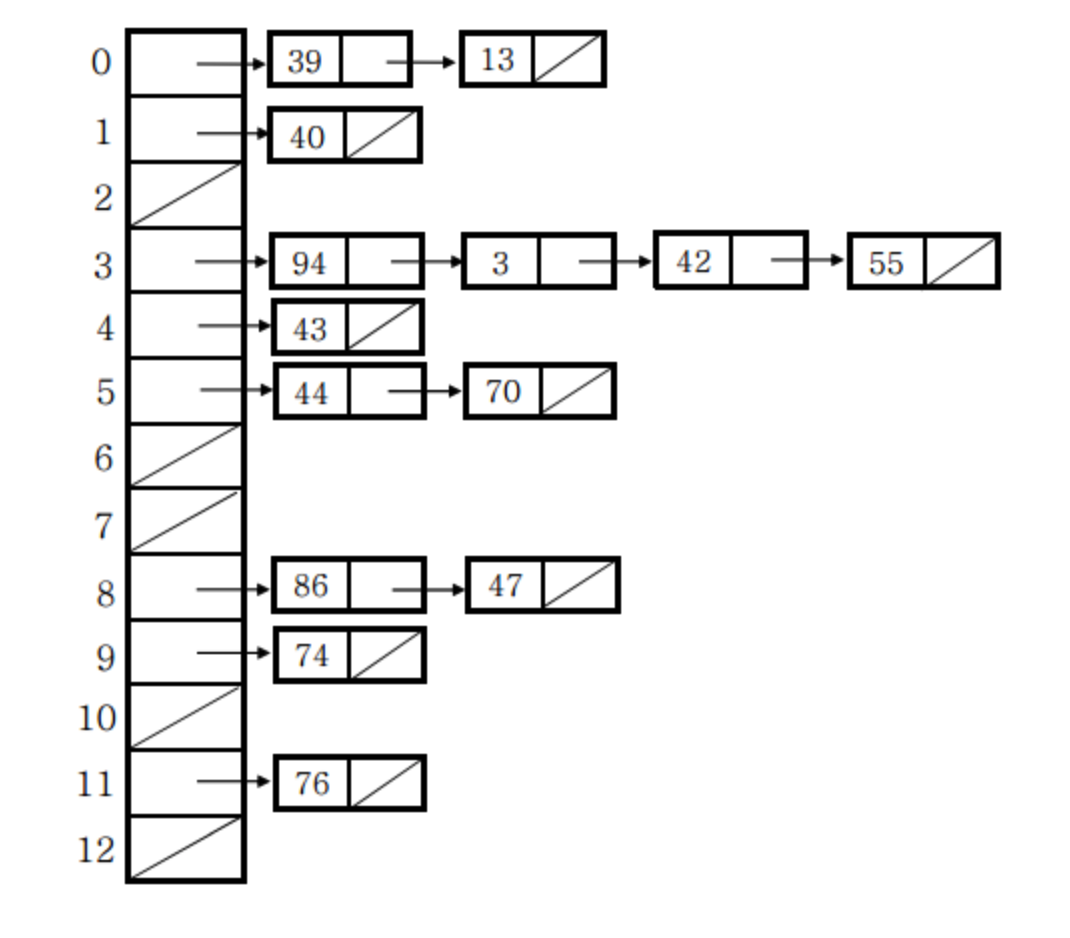
출처 : https://coding6467.tistory.com/14

In [4]:
from __future__ import annotations
from typing import Any, Type
import hashlib

class Node:
    # 해시를 구성하는 노드
    
    def __init__(self, key : Any, value : Any, next : Node) -> None:
        
        self.key = key
        self.value = value
        self.next = next
        
class ChinedHash:
    
    def __init__(self, capacity : int) -> None:
        
        self.capacity = capacity 
        # 해시 테이블 크기 지정 
        
        self.table = [None] * capacity
        # 해시 테이블을 선언 
        # 현재 해시 테이블안에는 모든 버킷이 비어있음 
        # 해시 테이블을 크게 만들면 충돌을 피할 수 있지만 그것은 메모리를 낭비
        # 충돌을 피하기 위해 해시 함수가 해시 테이블 크기보다 작거나 같은 정수를 고르게 생성 
        
    def hash_value(self, key : Any) -> int:
        # 해시 값 구하는 것 
        if isinstance(key, int):
            return key % self.capacity # 키를 테이블 크기만큼 나눈 것을 리턴 
        return(int(hashlib.sha20256(str(key).encode()).hexdigest(),16) % self.capacity)
    
    def search(self, key : Any) -> Any:
        # 키가 key인 원소를 검색하여 값을 반환 
        hash = self.hash_value(key)
        # 검색하는 키의 해시값 
        p = self.table[hash]
        
        while p is not None:
            if p.key == key: # p의 키와 내가 찾고 싶은 키가 같으면 
                return p.value # 검색 성공 
            p = p.next # 뒤쪽 노드 주목 
        return None # 검색 실패 
    
    def add(self, key : Any, value : Any) -> bool:
        
        hash = self.hash_value(key)
        # 추가하고자하는 key의 해시값 
        p = self.table[hash]
        
        while p is not None:
            if p.key == key: # p의 키와 내가 찾고 싶은 키가 같으면 
                return False # 추가 실패 
            p = p.next # 뒤쪽 노드 주목 
        
        temp = Node(key, value, self.table[hash]) # 새로운 노드 생성 
        self.table[hash] = temp # 노드에 해시값 넣기 
        return True # 성공 
    
    def remove(self, key : Any) -> bool:
        # 키가 key인 원소 삭제 
        
        hash = self.hash_value(key) # 해시값 도출 
        p = self.table[hash] # 노드 주목 
        pp = None 
        
        while p is not None: # None이 아닐때 
            if p.key == key:
                if pp is None:
                    self.table[hash] = p.next 
                else:
                    pp.next = p.next
                return True # key 삭제 성공 
            pp = p
            p = p.next 
        return False # 삭제 실패 
    
    def dump(self) -> None:
        
        for i in range(self.capacity):
            p = self.table[i]
            print(i, end = '')
            while p is not None:
                print(f'  -> {p.key} ({p.value})', end = '')
                p = p.next
            print()
            
    # dump()함수는 해시 테이블의 내용을 한꺼번에 통째로 출력하는 것 

In [12]:
from enum import Enum
from chained_hash import ChainedHash

Menu = Enum('Menu', ['추가', '삭제', '검색', '덤프', '종료']) 

def select_menu() -> Menu:
    
    s = [f'({m.value}){m.name}' for m in Menu]
    
    while True:
        
        print(*s, sep = '  ', end = '')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)
        
hash = ChainedHash(13)  # 크기가 13인 해시 테이블 생성 

while True:
    menu = select_menu()
    
    if menu == Menu.추가:
        key = int(input('추가할 키를 입력 : '))
        val = input('추가할 값을 입력 : ')
        if not hash.add(key, val):
            print('추가에 실패했습니다! ')
            
    elif menu == Menu.삭제:
        key = int(input('삭제할 키를 입력 : '))
        if not hash.remove(key):
            print('삭제에 실패했습니다! ')
            
    elif menu == Menu.검색:
        key = int(input('검색할 키를 입력 : '))
        t = hash.search(key)
        
        if t is not None:
            print(f'검색한 키를 가지는 값은 {t} 입니다.')
        else:
            print('검색할 데이터가 없습니다.')
            
    elif menu == Menu.덤프:
        hash.dump()
        
    else:
        break

(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 1
추가할 키를 입력 : 1
추가할 값을 입력 : 수연
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 1
추가할 키를 입력 : 5
추가할 값을 입력 : 동혁
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 1
추가할 키를 입력 : 10
추가할 값을 입력 : 예지
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 1
추가할 키를 입력 : 12
추가할 값을 입력 : 원준
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 1
추가할 키를 입력 : 14
추가할 값을 입력 : 민서
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 3
검색할 키를 입력 : 5
검색한 키를 가지는 값은 동혁 입니다.
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 4
0
1  -> 14 (민서)  -> 1 (수연)
2
3
4
5  -> 5 (동혁)
6
7
8
9
10  -> 10 (예지)
11
12  -> 12 (원준)
(1)추가  (2)삭제  (3)검색  (4)덤프  (5)종료: 5
